# Analysis of the dataset we got from simulation

This notebook continues the work of two previous notebooks

[NLP Dataset preparation and helper function for ChatGPT](notebook_preparation_work.ipynb)

[ChatGPT simulation](notebook_chatgpt_simulation.ipynb)

In [17]:
!pip install seaborn

In [18]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np


## Cleaning and exploring the data

In [19]:
SIMULATION_DATASET_FILENAME='simulation_data/gpt_simulation_04_0621.csv'

simulation_dataset=pd.read_csv(SIMULATION_DATASET_FILENAME)

In [20]:
simulation_dataset

,Unnamed: 0.1,Unnamed: 0,request,label,ds_responses_count,chatgpt_response,scores,min_score,max_score,mean_score
0,0,0.0,A few years ago I was making love to my wife w...,Topic: Sexual Dysfunction\r\nMental Disorder: ...,6,I'm sorry to hear that you are going through t...,[70 75 85 25 74 70],25,85,66.500000
1,1,1.0,A few years ago I was making love to my wife w...,Topic: Sexual Dysfunction\r\nMental Disorder: ...,6,I'm sorry to hear that you are going through t...,[74 75 85 60 85 74],60,85,75.500000
2,2,2.0,A few years ago I was making love to my wife w...,Topic: Sexual Dysfunction\r\nMental Disorder: ...,6,I'm sorry to hear that you're going through th...,[72 70 85 20 85 85],20,85,69.500000
3,3,3.0,"After 40 years of being straight, how could I ...","Sexuality, Identity Crisis",6,Sexual orientation can be fluid and can change...,[85 70 90 90 70 65],65,90,78.333333
4,4,4.0,"After 40 years of being straight, how could I ...","Sexuality, Identity Crisis",6,"Sexual orientation can be complex and fluid, a...",[85 40 89 90 75 63],40,90,73.666667
...,...,...,...,...,...,...,...,...,...,...
616,616,NaN,Whenever I run into a situation that makes me ...,"Anger, Relationship Issues",3,It's great that you recognize the impact your ...,[70 82 70],70,82,74.000000
617,617,NaN,Whenever I run into a situation that makes me ...,"Anger, Relationship Issues",3,It's great that you're reflecting on your beha...,[75 85 72],72,85,77.333333
618,618,NaN,he just walks in the house whenever he wants t...,"Family Issues, Anxiety",5,It's important to establish clear boundaries a...,[60 10 60 70 30],10,70,46.000000
619,619,NaN,he just walks in the house whenever he wants t...,"Family Issues, Anxiety",5,It's important to establish boundaries and com...,[63 10 70 70 40],10,70,50.600000


In [21]:
def first_label(labels):
    return labels.iloc[0]

simulation_dataset_aggregated = simulation_dataset.groupby('request').agg( {'label': first_label, 'min_score': 'min', 'max_score': 'max', 'mean_score': 'mean'})


In [22]:
simulation_dataset_aggregated

,label,min_score,max_score,mean_score
request,,,,
"A few years ago I was making love to my wife when for no known reason I lost my erection, Now I'm In my early 30s and my problem has become more and more frequent. This is causing major problems for my ego and it's diminishing my self esteem. This has resulted in ongoing depression and tearing apart my marriage. I am devastated and cannot find a cause for these issues. I am very attracted to my wife and want to express it in the bedroom like I used to. What could be causing this, and what can I do about it?",Topic: Sexual Dysfunction\r\nMental Disorder: ...,20,85,70.500000
"After 40 years of being straight, how could I now find myself interested in people of the same sex? I have had a few same sex encounters of my own doing.","Sexuality, Identity Crisis",30,90,74.555556
"After I told them, they yelled at me.","Family Conflict, Anxiety",30,85,70.875000
"After first meeting the client, what is the process that a counselor facilitates?","Counseling, Anxiety",45,85,75.095238
"After he got home from the hospital he was angry, then for a time wonderful. Now he is depressed and hopeless again.",Depression,10,90,61.518519
...,...,...,...,...
"When I'm in large crowds I get angry and I just can't deal with people. I don't really like other people (I prefer animals) they make me nervous and scared.\r\n I lay awake at night thinking and having conversations in my head and i almost always end up making myself feel terrible and crying, I have more conversions in my head than I do with actual people. I don't know what's wrong with me and why I feel this way. What should I do?","Social Anxiety, Depression",30,90,74.766667
"When my boyfriend gets in a snit, he gives me the silent treatment for days. When I ask what is wrong, I get nothing: no reply, no phone call. If he does reply, it is something very sarcastic and hurtful. He never admits he is wrong and never apologizes.","Relationship Issues, Passive-Aggressive",10,85,63.600000
"When my daughter is stressed about a silly thing from school, she starts crying and freaking out. She is a bright student, always has a 4.0, but I am afraid she is stressing too much. I’m afraid it’s going to break her. I don't know if I should get her to a doctor or someone because this is not normal.","Anxiety, Stress",20,90,70.666667


In [23]:
simulation_dataset_aggregated.describe()

,min_score,max_score,mean_score
count,207.000000,207.000000,207.000000
mean,50.376812,85.826087,73.093634
std,23.013146,7.036569,9.174937
min,5.000000,20.000000,13.333333
25%,30.000000,85.000000,69.788889
50%,62.000000,86.000000,74.600000
75%,70.000000,90.000000,78.902778
max,83.000000,95.000000,87.466667


In [24]:
simulation_dataset_aggregated[simulation_dataset_aggregated['label'].str.lower().str.startswith('topic')]['label'].values

array(['Topic: Sexual Dysfunction\r\nMental Disorder: Depression',
       'Topic: Counseling\r\nMental Disorder: N/A',
       'Topic: [Lack of Direction, Disappointment]\r\nMental Disorder: [Depression]',
       'Topic: Depression\r\nMental Disorder: Major Depressive Disorder'],
      dtype=object)

In [25]:
label_errors=np.array(['Topic: Sexual Dysfunction\r\nMental Disorder: Depression',
       'Topic: Counseling\r\nMental Disorder: N/A',
       'Topic: [Lack of Direction, Disappointment]\r\nMental Disorder: [Depression]',
       'Topic: Depression\r\nMental Disorder: Major Depressive Disorder'],
      dtype=object)

label_fix=np.array(['Sexual Dysfunction, Depression',
       'Counseling',
       'Depression',
       'Depression, Major Depressive Disorder'],
      dtype=object)

for i, error_label in enumerate(label_errors):
    correct_label = label_fix[i]
    simulation_dataset_aggregated['label'] = simulation_dataset_aggregated['label'].replace(error_label, correct_label)


In [26]:
simulation_dataset_aggregated

,label,min_score,max_score,mean_score
request,,,,
"A few years ago I was making love to my wife when for no known reason I lost my erection, Now I'm In my early 30s and my problem has become more and more frequent. This is causing major problems for my ego and it's diminishing my self esteem. This has resulted in ongoing depression and tearing apart my marriage. I am devastated and cannot find a cause for these issues. I am very attracted to my wife and want to express it in the bedroom like I used to. What could be causing this, and what can I do about it?","Sexual Dysfunction, Depression",20,85,70.500000
"After 40 years of being straight, how could I now find myself interested in people of the same sex? I have had a few same sex encounters of my own doing.","Sexuality, Identity Crisis",30,90,74.555556
"After I told them, they yelled at me.","Family Conflict, Anxiety",30,85,70.875000
"After first meeting the client, what is the process that a counselor facilitates?","Counseling, Anxiety",45,85,75.095238
"After he got home from the hospital he was angry, then for a time wonderful. Now he is depressed and hopeless again.",Depression,10,90,61.518519
...,...,...,...,...
"When I'm in large crowds I get angry and I just can't deal with people. I don't really like other people (I prefer animals) they make me nervous and scared.\r\n I lay awake at night thinking and having conversations in my head and i almost always end up making myself feel terrible and crying, I have more conversions in my head than I do with actual people. I don't know what's wrong with me and why I feel this way. What should I do?","Social Anxiety, Depression",30,90,74.766667
"When my boyfriend gets in a snit, he gives me the silent treatment for days. When I ask what is wrong, I get nothing: no reply, no phone call. If he does reply, it is something very sarcastic and hurtful. He never admits he is wrong and never apologizes.","Relationship Issues, Passive-Aggressive",10,85,63.600000
"When my daughter is stressed about a silly thing from school, she starts crying and freaking out. She is a bright student, always has a 4.0, but I am afraid she is stressing too much. I’m afraid it’s going to break her. I don't know if I should get her to a doctor or someone because this is not normal.","Anxiety, Stress",20,90,70.666667


In [27]:
simulation_dataset_aggregated[simulation_dataset_aggregated['label'].str.lower().str.startswith('topic')]['label'].values

array([], dtype=object)

## Visualisation

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


def visualize_data(dataframe):
    # Histograms
    plt.figure(figsize=(12, 6))
    plt.suptitle('Scores of ChatGPT effectiveness on mental support, compared to human mental counselors\' responses', fontsize=16)
    plt.subplot(1, 3, 1)
    plt.hist(dataframe['min_score'], bins=20, color='blue', alpha=0.7)
    plt.title('Min Scores Histogram')
    plt.xlabel('Min Score')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(dataframe['max_score'], bins=20, color='green', alpha=0.7)
    plt.title('Max Scores Histogram')
    plt.xlabel('Max Score')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(dataframe['mean_score'], bins=20, color='red', alpha=0.7)
    plt.title('Mean Scores Histogram')
    plt.xlabel('Mean Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Boxplots
    plt.figure(figsize=(10, 6))
    plt.suptitle('Boxplots of ChatGPT effectiveness compared to human mental counselors\' responses', fontsize=16)
    dataframe.boxplot(column=['min_score', 'max_score', 'mean_score'])
    plt.title('Boxplots of Min, Max, and Mean Scores')
    plt.ylabel('Score')
    plt.show()

    # # Scatter plot
    # plt.figure(figsize=(8, 6))
    # plt.scatter(dataframe['mean_score'], c='blue', alpha=0.5)
    # plt.title('Scatter Plot of Min vs Max Scores')
    # plt.xlabel('Min Score')
    # plt.ylabel('Max Score')
    # plt.show()

    # # Line plot
    # plt.figure(figsize=(10, 6))
    # plt.plot(dataframe['min_score'], label='_nolegend_', marker='o', linestyle='-')
    # plt.plot(dataframe['max_score'], label='_nolegend_', marker='o', linestyle='-')
    # plt.plot(dataframe['mean_score'], label='_nolegend_', marker='o', linestyle='-')
    # plt.title('Line Plot of Min, Max, and Mean Scores')
    # plt.xlabel('Index')
    # plt.ylabel('Score')
    # plt.show()

    # # Bar plot
    # plt.figure(figsize=(12, 6))
    # indices = range(len(dataframe))
    # plt.bar(indices, dataframe['min_score'], color='blue', alpha=0.7, label='Min Score')
    # plt.bar(indices, dataframe['max_score'], color='green', alpha=0.7, label='Max Score', bottom=dataframe['min_score'])
    # plt.bar(indices, dataframe['mean_score'], color='red', alpha=0.7, label='Mean Score', bottom=dataframe['min_score']+dataframe['max_score'])
    # plt.title('Bar Plot of Min, Max, and Mean Scores')
    # plt.xlabel('Index')
    # plt.ylabel('Score')
    # plt.legend()
    # plt.show()

    # Heatmap
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(dataframe[['min_score', 'max_score', 'mean_score']].corr(), annot=True, cmap='coolwarm')
    # plt.imshow(dataframe[['min_score', 'max_score', 'mean_score']].corr(), cmap='coolwarm', interpolation='nearest')

    # plt.title('Correlation Heatmap of Min, Max, and Mean Scores')
    # plt.show()

# Call the function



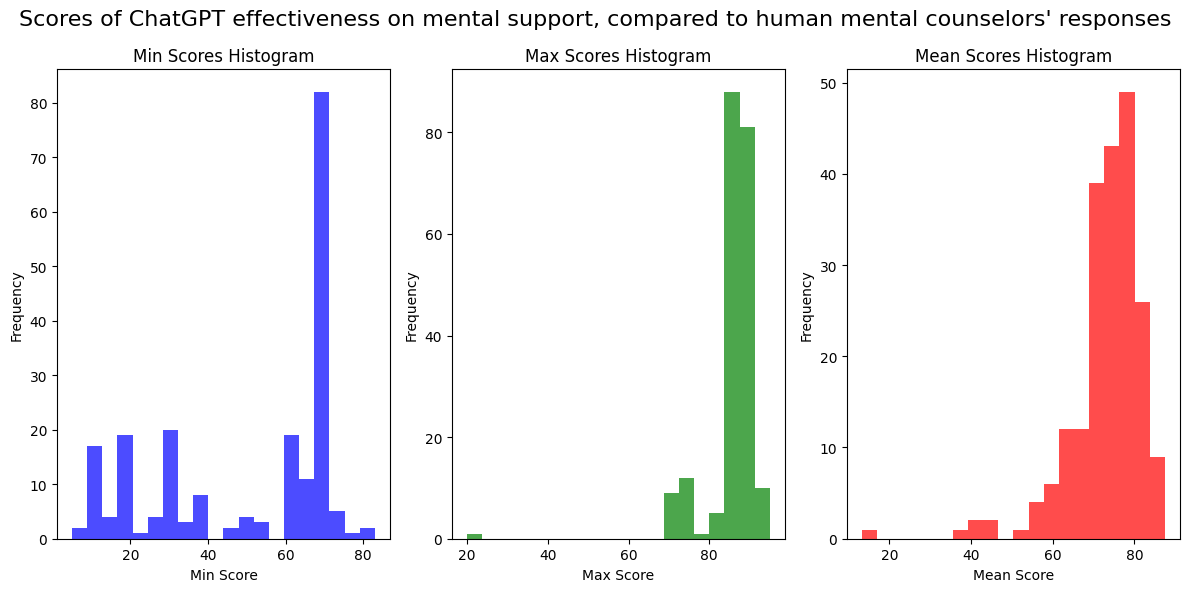

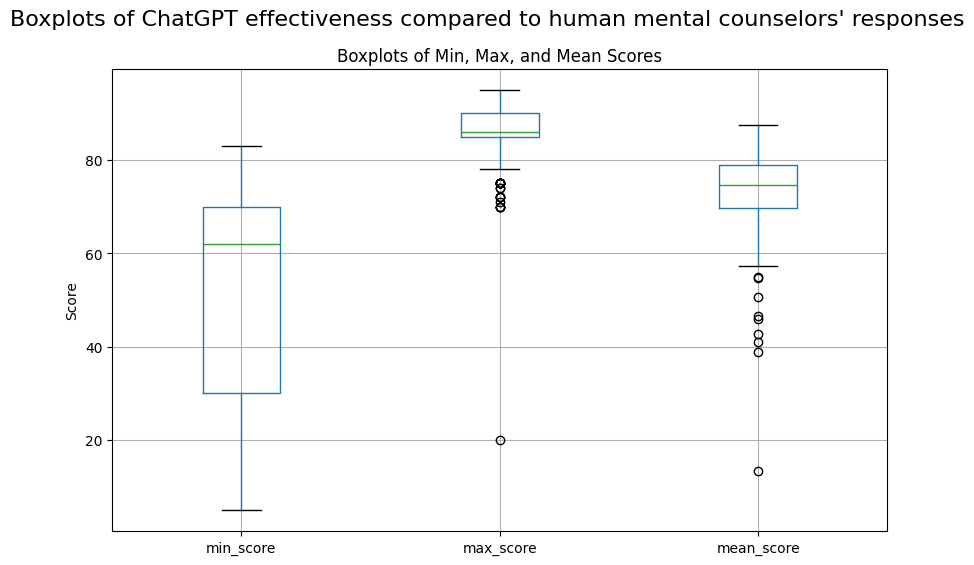

In [29]:

visualize_data(simulation_dataset_aggregated.reset_index())

## Explore by labels

In [30]:
# Splitting labels containing multiple values into separate rows
simulation_dataset_by_labels = simulation_dataset_aggregated['label'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('label')

simulation_dataset_by_labels = simulation_dataset_aggregated.drop('label', axis=1).join(simulation_dataset_by_labels)
# Performing desired aggregations on the split labels
# For example, counting the occurrences of each label



In [31]:
simulation_dataset_by_labels

,min_score,max_score,mean_score,label
request,,,,
"A few years ago I was making love to my wife when for no known reason I lost my erection, Now I'm In my early 30s and my problem has become more and more frequent. This is causing major problems for my ego and it's diminishing my self esteem. This has resulted in ongoing depression and tearing apart my marriage. I am devastated and cannot find a cause for these issues. I am very attracted to my wife and want to express it in the bedroom like I used to. What could be causing this, and what can I do about it?",20,85,70.500000,Sexual Dysfunction
"A few years ago I was making love to my wife when for no known reason I lost my erection, Now I'm In my early 30s and my problem has become more and more frequent. This is causing major problems for my ego and it's diminishing my self esteem. This has resulted in ongoing depression and tearing apart my marriage. I am devastated and cannot find a cause for these issues. I am very attracted to my wife and want to express it in the bedroom like I used to. What could be causing this, and what can I do about it?",20,85,70.500000,Depression
"After 40 years of being straight, how could I now find myself interested in people of the same sex? I have had a few same sex encounters of my own doing.",30,90,74.555556,Sexuality
"After 40 years of being straight, how could I now find myself interested in people of the same sex? I have had a few same sex encounters of my own doing.",30,90,74.555556,Identity Crisis
"After I told them, they yelled at me.",30,85,70.875000,Family Conflict
...,...,...,...,...
"When my daughter is stressed about a silly thing from school, she starts crying and freaking out. She is a bright student, always has a 4.0, but I am afraid she is stressing too much. I’m afraid it’s going to break her. I don't know if I should get her to a doctor or someone because this is not normal.",20,90,70.666667,Stress
"Whenever I run into a situation that makes me upset or angry, I tend to start cursing and badly offending the person I am confronting. I say mean things to let my anger out. Whenever people tell me stuff about my relationship (like starting rumors or saying negative things about me or my relationship) I lash out not just them but at my boyfriend. I feel like I keep causing drama due to my personality. I want to be a better person and learn to let things not get to me and be happy and graceful. I hurt the ones I love with my words. I want to be better for myself and them.",70,85,75.444444,Anger
"Whenever I run into a situation that makes me upset or angry, I tend to start cursing and badly offending the person I am confronting. I say mean things to let my anger out. Whenever people tell me stuff about my relationship (like starting rumors or saying negative things about me or my relationship) I lash out not just them but at my boyfriend. I feel like I keep causing drama due to my personality. I want to be a better person and learn to let things not get to me and be happy and graceful. I hurt the ones I love with my words. I want to be better for myself and them.",70,85,75.444444,Relationship Issues


In [32]:
simulation_dataset_by_labels['label'].values

array(['Sexual Dysfunction', 'Depression', 'Sexuality', 'Identity Crisis',
       'Family Conflict', 'Anxiety', 'Counseling', 'Anxiety',
       'Depression', 'Trust Issues', 'Relationship Struggles',
       'Mental Health', 'Skepticism', 'Social Anxiety',
       'Rejection Sensitivity', 'Abuse', 'Anger',
       'Seasonal Affective Disorder', 'Depression', 'Psychosis',
       'Anxiety', 'Relationship Issues', 'Insecurity',
       'Relationship Issues', 'Anxiety', 'Self-Esteem', 'Relationships',
       'Indecision', 'Personality Disorders', 'Therapy', 'Anxiety',
       'Therapy', 'Decision-making', 'Counseling', 'Sexual Anxiety',
       'Body Image', 'Cross-Dressing', 'Fetishism', 'Anxiety',
       'Self-Esteem', 'Trauma', 'PTSD', 'Depression', 'Cultural Shock',
       'Body Image', 'Low Self-Esteem', 'Family Issues',
       'Low Self-Esteem', 'Stress', 'Anxiety', 'Family', 'Control',
       'Infidelity', 'Guilt', 'Depression', 'Anxiety', 'Depression',
       'Schizophrenia', 'Relationsh

In [33]:
simulation_dataset_by_labels['label'] = simulation_dataset_by_labels['label'].apply(lambda x: x.split('\r\n')[0].strip('[').strip(']').strip())

In [34]:
simulation_dataset_by_labels['label'].value_counts()

label
Anxiety                56
Relationship Issues    42
Depression             39
Low Self-Esteem         9
Stress                  9
                       ..
Financial Stress        1
Attachment Disorder     1
Skepticism              1
Compulsive Behavior     1
Passive-Aggressive      1
Name: count, Length: 130, dtype: int64

In [59]:
simulation_dataset_aggregated_by_labels=simulation_dataset_by_labels.groupby('label').agg( { 'min_score': 'min', 'max_score': 'max', 'mean_score': 'mean'})

In [60]:
simulation_dataset_aggregated_by_labels

,min_score,max_score,mean_score,mean_score_std
label,,,,
Abuse,60,86,71.666667,NaN
Addiction,15,85,70.996914,6.702132
Adjustment Disorder,70,90,78.266667,NaN
Alcohol Addiction,65,85,71.222222,NaN
Alcoholism,30,85,60.800000,NaN
...,...,...,...,...
Therapy,10,95,81.844444,2.417605
Trauma,20,90,78.727778,4.550155
Trust Issues,5,93,72.518959,8.123881


In [37]:
def top_labels_graph(graph_title,column='mean_score',figsize=(12, 8),dataset=simulation_dataset_aggregated_by_labels, top_number=30, ascending=False):
    """this helper function plots a graph of disorder labels sorted by values

    Args:
        column (_type_): disorder type (namr of column)
        figsize (tuple, optional): Plot figure size. Defaults to (12, 8).
        dataset (DataFrame): dataset to use
        top_number (int): how many first entites to display
        ascending (bool) defalut False: Sort order
    """
    sorted_dataset = dataset.sort_values(by=column, ascending=ascending)

    # Select the top_number entities
    top_entities = sorted_dataset.head(top_number)

    # Plotting the bar graph
    plt.figure(figsize=figsize)
    # top_entities[column].plot(kind='barh', color='orange')
    plt.barh(top_entities.index, top_entities[column], color='orange', label='Mean Score')
    plt.barh(top_entities.index, top_entities['max_score'] - top_entities['mean_score'], left=top_entities['mean_score'], color='blue', label='Max Score', alpha=0.3)
    plt.barh(top_entities.index, top_entities['mean_score'] - top_entities['min_score'], left=top_entities['min_score'], color='green', label='Min Score', alpha=0.3)
    plt.title(graph_title)
    plt.ylabel('Topic of seeking help')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.gca().invert_yaxis()
    legend=plt.legend(loc='lower left')
    legend.get_frame().set_alpha(0.6)
    for text in legend.get_texts():
        text.set_alpha(0.7)
    plt.show()

## On what topics ChatGPT is good, and on what it is bad

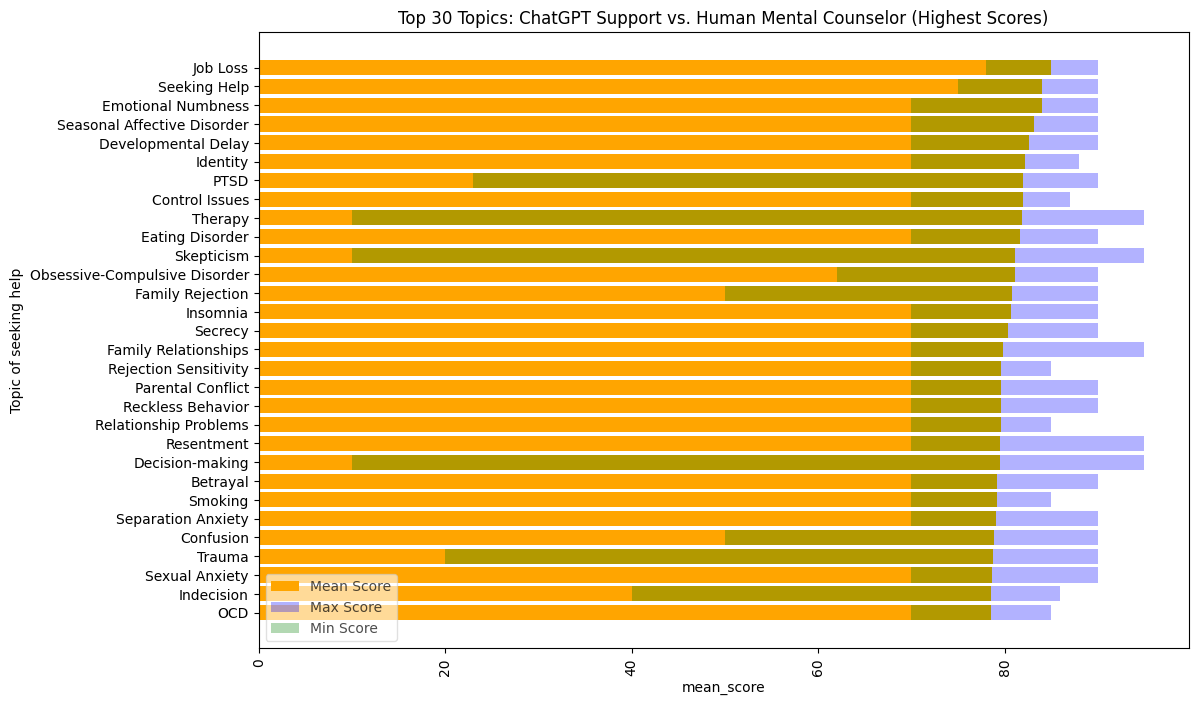

In [51]:
top_labels_graph('Top 30 Topics: ChatGPT Support vs. Human Mental Counselor (Highest Scores)')

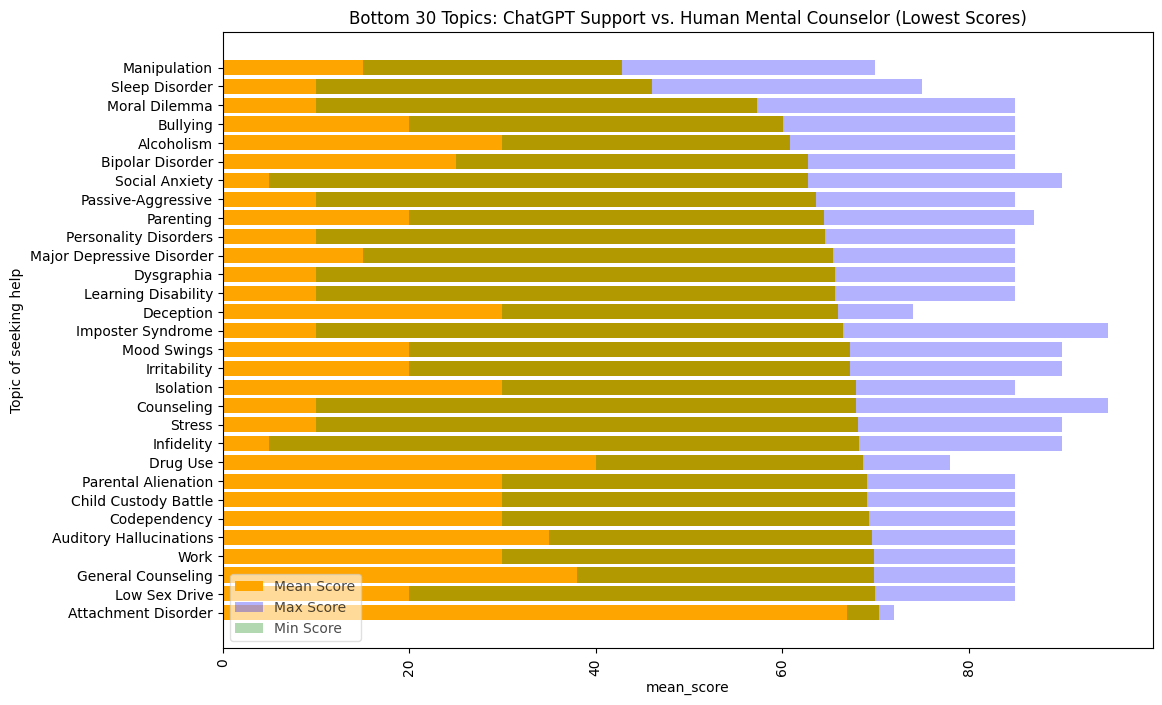

In [52]:
top_labels_graph('Bottom 30 Topics: ChatGPT Support vs. Human Mental Counselor (Lowest Scores)', ascending=True)

In [40]:
simulation_dataset_by_labels

,min_score,max_score,mean_score,label
request,,,,
"A few years ago I was making love to my wife when for no known reason I lost my erection, Now I'm In my early 30s and my problem has become more and more frequent. This is causing major problems for my ego and it's diminishing my self esteem. This has resulted in ongoing depression and tearing apart my marriage. I am devastated and cannot find a cause for these issues. I am very attracted to my wife and want to express it in the bedroom like I used to. What could be causing this, and what can I do about it?",20,85,70.500000,Sexual Dysfunction
"A few years ago I was making love to my wife when for no known reason I lost my erection, Now I'm In my early 30s and my problem has become more and more frequent. This is causing major problems for my ego and it's diminishing my self esteem. This has resulted in ongoing depression and tearing apart my marriage. I am devastated and cannot find a cause for these issues. I am very attracted to my wife and want to express it in the bedroom like I used to. What could be causing this, and what can I do about it?",20,85,70.500000,Depression
"After 40 years of being straight, how could I now find myself interested in people of the same sex? I have had a few same sex encounters of my own doing.",30,90,74.555556,Sexuality
"After 40 years of being straight, how could I now find myself interested in people of the same sex? I have had a few same sex encounters of my own doing.",30,90,74.555556,Identity Crisis
"After I told them, they yelled at me.",30,85,70.875000,Family Conflict
...,...,...,...,...
"When my daughter is stressed about a silly thing from school, she starts crying and freaking out. She is a bright student, always has a 4.0, but I am afraid she is stressing too much. I’m afraid it’s going to break her. I don't know if I should get her to a doctor or someone because this is not normal.",20,90,70.666667,Stress
"Whenever I run into a situation that makes me upset or angry, I tend to start cursing and badly offending the person I am confronting. I say mean things to let my anger out. Whenever people tell me stuff about my relationship (like starting rumors or saying negative things about me or my relationship) I lash out not just them but at my boyfriend. I feel like I keep causing drama due to my personality. I want to be a better person and learn to let things not get to me and be happy and graceful. I hurt the ones I love with my words. I want to be better for myself and them.",70,85,75.444444,Anger
"Whenever I run into a situation that makes me upset or angry, I tend to start cursing and badly offending the person I am confronting. I say mean things to let my anger out. Whenever people tell me stuff about my relationship (like starting rumors or saying negative things about me or my relationship) I lash out not just them but at my boyfriend. I feel like I keep causing drama due to my personality. I want to be a better person and learn to let things not get to me and be happy and graceful. I hurt the ones I love with my words. I want to be better for myself and them.",70,85,75.444444,Relationship Issues


In [41]:
top_labels = simulation_dataset_by_labels['label'].value_counts().head(30).index
simulation_dataset_by_labels_top_occurrences = simulation_dataset_by_labels[simulation_dataset_by_labels['label'].isin(top_labels)]

In [42]:
simulation_dataset_by_labels_top_occurrences

,min_score,max_score,mean_score,label
request,,,,
"A few years ago I was making love to my wife when for no known reason I lost my erection, Now I'm In my early 30s and my problem has become more and more frequent. This is causing major problems for my ego and it's diminishing my self esteem. This has resulted in ongoing depression and tearing apart my marriage. I am devastated and cannot find a cause for these issues. I am very attracted to my wife and want to express it in the bedroom like I used to. What could be causing this, and what can I do about it?",20,85,70.500000,Depression
"After 40 years of being straight, how could I now find myself interested in people of the same sex? I have had a few same sex encounters of my own doing.",30,90,74.555556,Sexuality
"After 40 years of being straight, how could I now find myself interested in people of the same sex? I have had a few same sex encounters of my own doing.",30,90,74.555556,Identity Crisis
"After I told them, they yelled at me.",30,85,70.875000,Anxiety
"After first meeting the client, what is the process that a counselor facilitates?",45,85,75.095238,Anxiety
...,...,...,...,...
"When my daughter is stressed about a silly thing from school, she starts crying and freaking out. She is a bright student, always has a 4.0, but I am afraid she is stressing too much. I’m afraid it’s going to break her. I don't know if I should get her to a doctor or someone because this is not normal.",20,90,70.666667,Stress
"Whenever I run into a situation that makes me upset or angry, I tend to start cursing and badly offending the person I am confronting. I say mean things to let my anger out. Whenever people tell me stuff about my relationship (like starting rumors or saying negative things about me or my relationship) I lash out not just them but at my boyfriend. I feel like I keep causing drama due to my personality. I want to be a better person and learn to let things not get to me and be happy and graceful. I hurt the ones I love with my words. I want to be better for myself and them.",70,85,75.444444,Anger
"Whenever I run into a situation that makes me upset or angry, I tend to start cursing and badly offending the person I am confronting. I say mean things to let my anger out. Whenever people tell me stuff about my relationship (like starting rumors or saying negative things about me or my relationship) I lash out not just them but at my boyfriend. I feel like I keep causing drama due to my personality. I want to be a better person and learn to let things not get to me and be happy and graceful. I hurt the ones I love with my words. I want to be better for myself and them.",70,85,75.444444,Relationship Issues


In [43]:
simulation_dataset_by_labels_top_occurrences_aggregated=simulation_dataset_by_labels_top_occurrences.groupby('label').agg( { 'min_score': 'min', 'max_score': 'max', 'mean_score': 'mean'})

In [44]:
simulation_dataset_by_labels_top_occurrences_aggregated

,min_score,max_score,mean_score
label,,,
Addiction,15,85,70.996914
Anger,40,86,73.844444
Anxiety,10,95,74.308572
Attachment Issues,60,90,74.048611
Bipolar Disorder,25,85,62.777778
Body Image,20,90,71.291667
Depression,10,95,73.305328
Family,20,90,77.064815
Family Issues,10,90,70.371296


## And here we take the most 30 popular topics, and sort them on how effective is ChatGPT help:

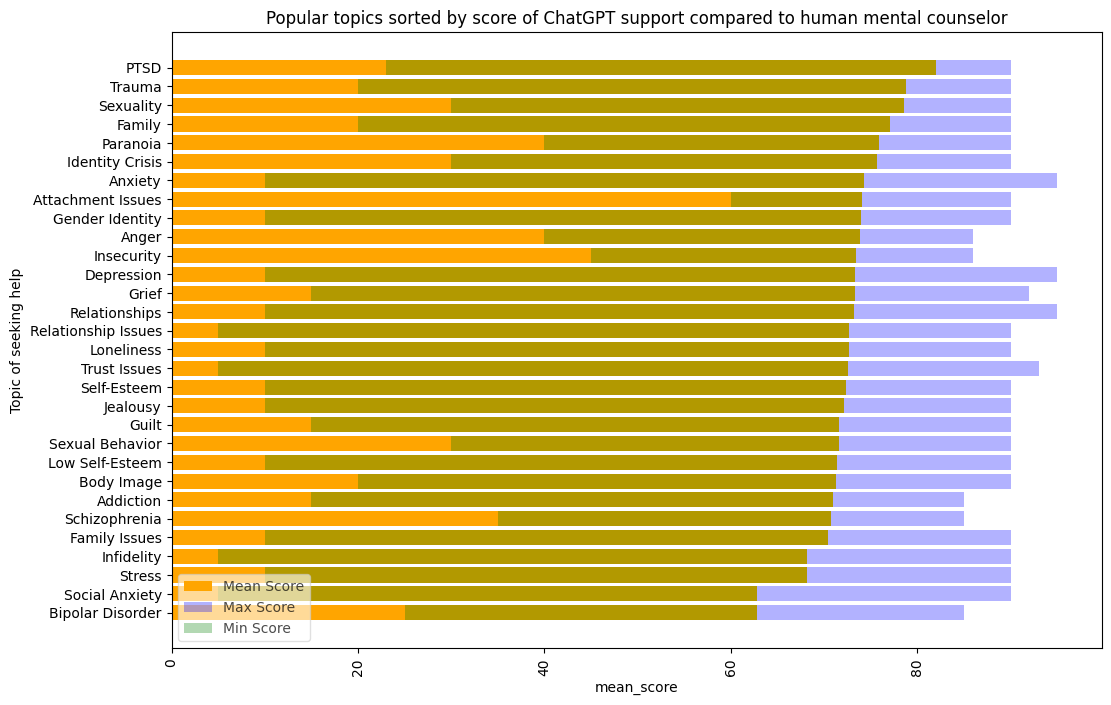

In [46]:
top_labels_graph('Popular topics sorted by score of ChatGPT support compared to human mental counselor', dataset=simulation_dataset_by_labels_top_occurrences_aggregated)

In [135]:
simulation_dataset_aggregated.to_csv('final_datasets/simulation_dataset_aggregated.csv')
simulation_dataset_aggregated_by_labels.to_csv('final_datasets/simulation_dataset_aggregated_by_labels.csv')
simulation_dataset_by_labels_top_occurrences_aggregated.to_csv('final_datasets/simulation_dataset_by_labels_top_occurrences_aggregated.csv')

# Conclusions

### The graphs and general mean

In [58]:
simulation_dataset_aggregated['mean_score'].mean()

73.09363354037268

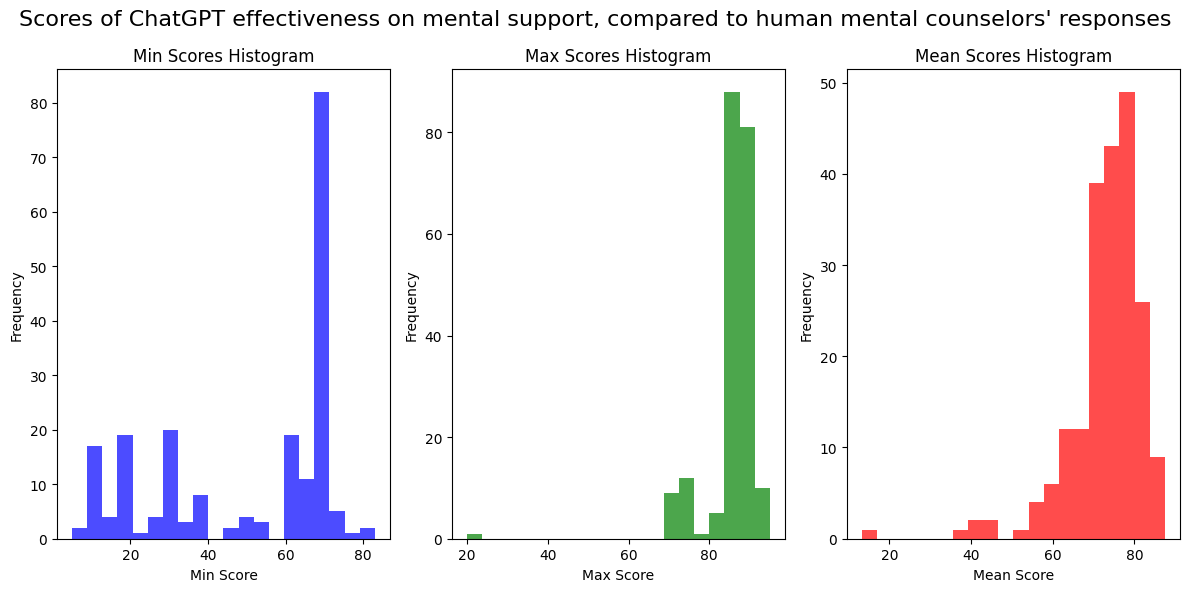

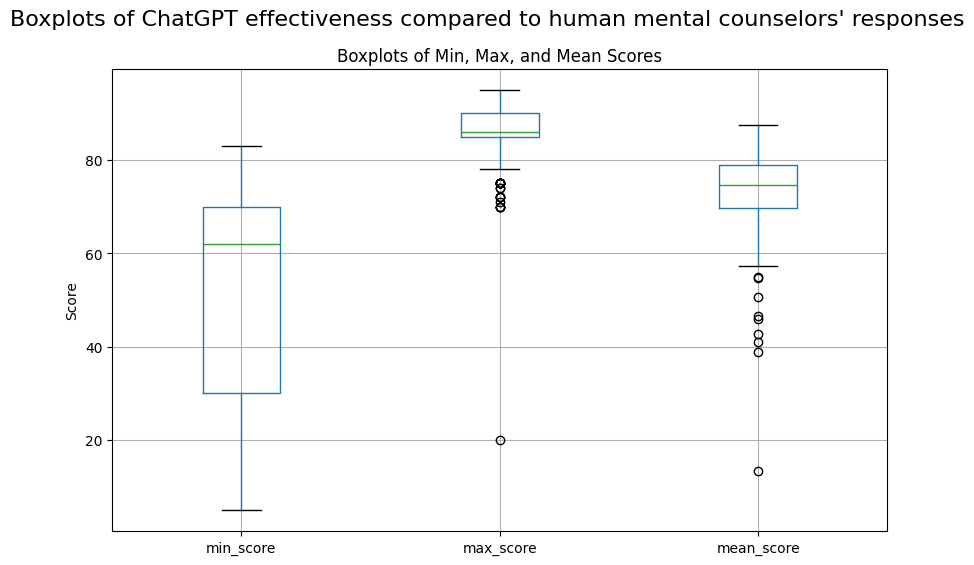

In [16]:
visualize_data(simulation_dataset_aggregated.reset_index())

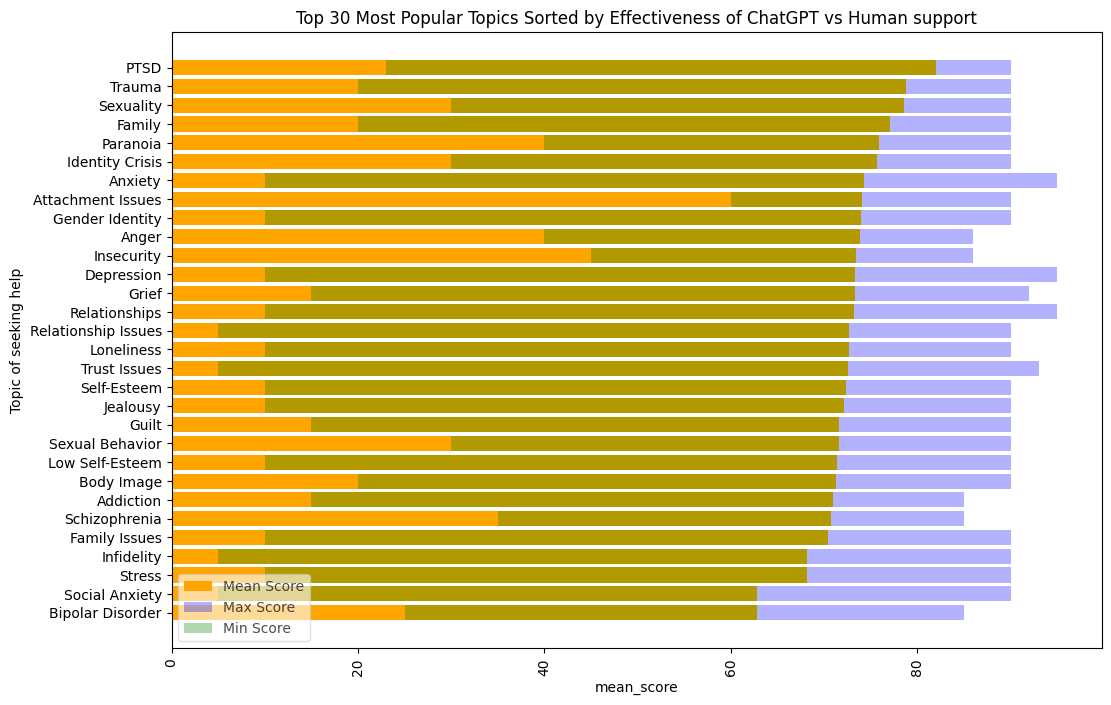

In [55]:
top_labels_graph('Top 30 Most Popular Topics Sorted by Effectiveness of ChatGPT vs Human support', dataset=simulation_dataset_by_labels_top_occurrences_aggregated)

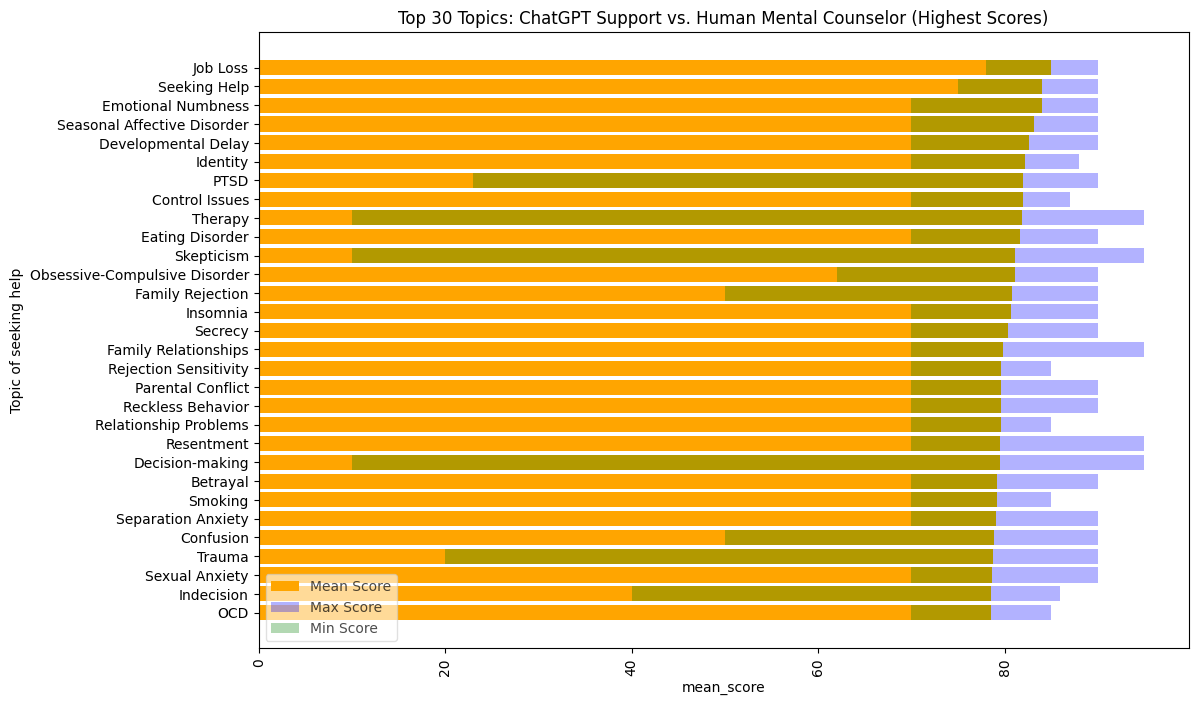

In [56]:
top_labels_graph('Top 30 Topics: ChatGPT Support vs. Human Mental Counselor (Highest Scores)')

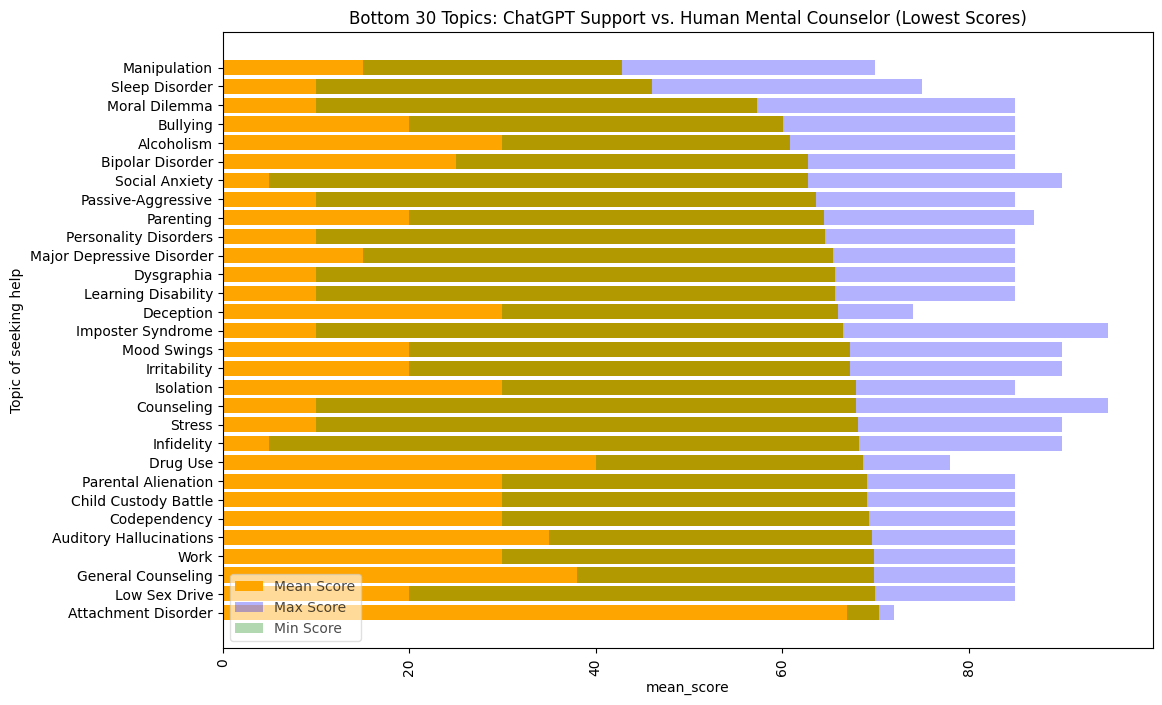

In [57]:
top_labels_graph('Bottom 30 Topics: ChatGPT Support vs. Human Mental Counselor (Lowest Scores)', ascending=True)

## Summary

As we can see from the initial general graphs (Histograms and Boxplots), ChatGPT responses to mental help requests are generally satisfactory. It's important to note that these questions are structured, and individuals seeking help often provide extensive and comprehensive descriptions of their situations. On average, there is a 73% similarity to responses suggested by human counselors. Therefore, if you formulate your request to ChatGPT with detailed descriptions, you have a 3/4 chance of receiving support comparable to that of a human mental counselor.

### Topics Differentiation

From the topic analysis section, it's evident that there are topics where ChatGPT performs well (with up to a 85% mean similarity) and others where its performance is lacking (with as low as a 42% mean similarity). 
The topics that perform best in this analysis include: Job Loss, Emotional Numbness, Seasonal Affective Disorder, Developmental Delay, Identity, PTSD and Control Issues.
Conversely, the worst-performing topics include: Manipulation, Sleep Disorder, Moral Dilemma, Bullying, Alcoholism, Bipolar Disorder, Social Anxiety, and Stress, Schizophrenia and Infidelity.
However, considering the tools and algorithms used in this simulation and analysis, we cannot have 100% confidence in this list. Further simulations and research are necessary to gather more data and increase confidence. 
One thing is certain: there are indeed many topics where ChatGPT cannot provide effective support. While it can be helpful in some cases, complete reliance on it could be detrimental. 
Based on the charts and list of topics, we can conclude that for milder issues, such as job loss, users are more likely to receive effective support, whereas for more complex cases, such as bipolar disorders, receiving relevant support is less likely. Furthermore, addressing harder cases may make it more challenging to formulate a correct and descriptive request.

### Final Conclusion

In conclusion, ChatGPT is a valuable tool that can be helpful in many cases, but it should be used cautiously. Relying solely on it for support may not always yield satisfactory results. 

Efforts should be made to raise awareness about using such tools to maximize positive impacts and minimize negative impacts on mental health.